## Diabetes Prediction Model

#### --> Support vector machine - SVM (Supervised Learning)

Support Vector Machine (SVM) is a machine learning algorithm used for classification and regression tasks. The algorithm finds the hyperplane that maximizes the margin between the classes of data points, which are represented as vectors in a high-dimensional space. The margin is the distance between the hyperplane and the closest data points from each class. SVM can handle both linear and nonlinear classification problems by mapping the input data into a higher-dimensional space through a kernel function. SVMs are widely used in various fields, such as bioinformatics, finance, and image recognition, due to their high accuracy and good generalization performance. SVMs can be sensitive to the choice of hyperparameters, such as the kernel function and regularization parameter, which should be carefully tuned to achieve the best performance.

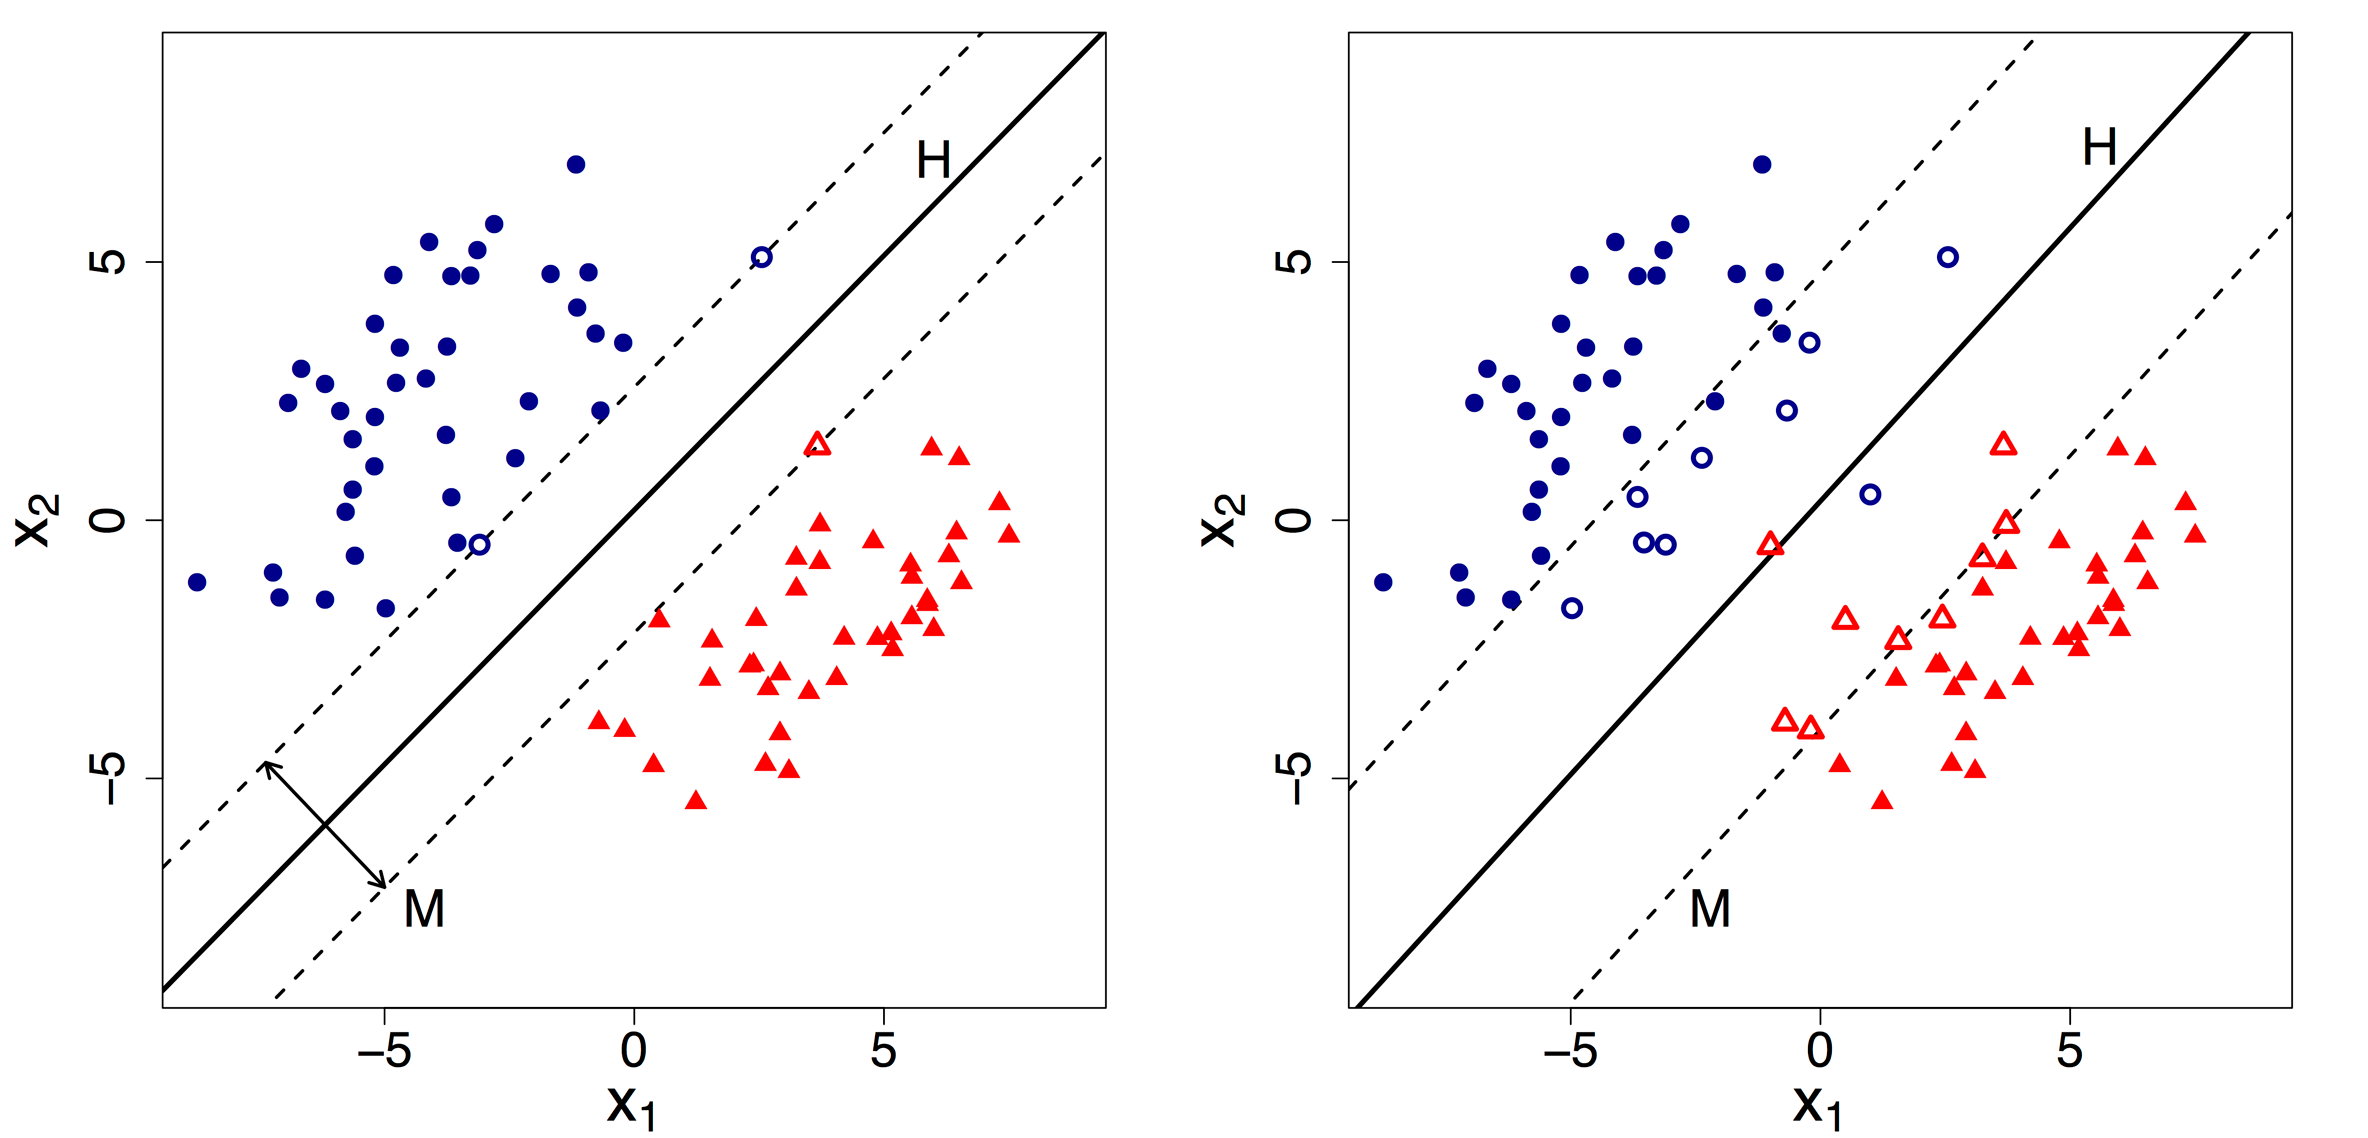

Use cases:

1. When the data is high-dimensional and has a clear separation between the classes: SVMs work well in high-dimensional spaces and can find the best hyperplane to separate the data into classes.

2. When the number of samples is smaller than the number of features: SVMs can handle this situation by using the kernel trick to transform the data into a higher-dimensional space where the classes are better separated.

3. When there is a need for good generalization performance: SVMs aim to maximize the margin between the classes, which helps to reduce overfitting and improve the model's generalization performance.

4. When the data is nonlinearly separable: SVMs can use a nonlinear kernel function to transform the data into a higher-dimensional space where it's easier to separate the classes.

5. When the classes are imbalanced: SVMs can use different types of kernels and loss functions to handle imbalanced classes, such as the weighted SVM and the cost-sensitive SVM.

In [1]:
import pandas as pd
import numpy as np

### DATA PROCESSING

In [2]:
dataset = pd.read_csv("diabetes.csv") ## Dataset of women and certain metrics

In [4]:
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
dataset["Outcome"].value_counts()
## 500 do not have diabetes and 268 do --> 0: non-diabetic // 1 --> diabetic

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
dataset.groupby("Outcome").mean()
## We can infer that older women are more susceptible to diabetes...

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
## Separating data and labels
X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]

In [12]:
## DATA STANDARDIZATION
from sklearn.preprocessing import StandardScaler

Standardization is necessary for some machine learning algorithms because they rely on the assumption that the input features are on the same scale or have a similar range of values. When the input features have different scales or ranges, some algorithms may give more importance to features with larger values, which can lead to biased results.

For example, consider a dataset with two input features: age (in years) and income (in dollars). If age ranges from 20 to 60 and income ranges from 20,000 to 200,000, an algorithm that is sensitive to scale differences may give more weight to income, even if age is just as important for making accurate predictions.

Standardization involves transforming the input features so that they have a mean of zero and a standard deviation of one. This process ensures that each feature contributes equally to the model's predictions, regardless of its original scale or range. Some machine learning algorithms, such as support vector machines, K-nearest neighbors, and principal component analysis, require standardized input features to work properly.

In addition, standardization can improve the performance of some optimization algorithms, such as gradient descent, by making the optimization process more efficient and stable.

In [14]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [17]:
X = scaler.transform(X) ## Standardized

In [18]:
print(X, y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Splitting Data (Training / Testing)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### TRAINING THE MODEL

In [22]:
from sklearn import svm

In [23]:
clf = svm.SVC(kernel='linear')

In [24]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

### Model Evaluation

In [45]:
def compute_accuracy(preds, labels):
    return (preds==labels).sum() / len(labels)

In [47]:
## Accuracy on Training data
train_preds = clf.predict(X_train)
train_acc = compute_accuracy(train_preds, y_train)
print("The training data accuracy score is: ", train_acc)

The training data accuracy score is:  0.7866449511400652


In [49]:
## Accuracy on Testing data
test_preds = clf.predict(X_test)
test_acc = compute_accuracy(test_preds, y_test)
print("The testing data accuracy score is: ", test_acc)

The testing data accuracy score is:  0.7727272727272727


### Making a predictive system

In [91]:
data_sample = np.array(dataset.sample())
input_data = data_sample[0, :-1].reshape(1, -1)
label = data_sample[0, -1]
print(input_data)
print(label)

[[  3.    169.     74.     19.    125.     29.9     0.268  31.   ]]
1.0


In [92]:
input_data = scaler.transform(input_data) ## Need do standardize the input as well
prediction = clf.predict(input_data)

/Users/thomasverdier/opt/anaconda3/envs/data_science/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [93]:
if prediction[0] == 0:
    print("The model predicts that this person does NOT have diabetes")
else:
    print("This model predicts the this person does have diabetes")

actual = "This person does have diabetes" if label == 1 else "This person does NOT have diabetes"
print(actual)


This model predicts the this person does have diabetes
This person does have diabetes
